<a href="https://colab.research.google.com/github/orudda/Thermalization-and-Metr-polis-algorithm/blob/main/metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import random, math, pylab

#Cod fonte

In [ ]:
@jit(nopython=True)
def estado_ini(N):
    #Gera um estadon inicial aleatório para rede
    s = np.zeros(N,dtype=np.int8)
    for i in range(N):
        s[i] = np.sign(2*np.random.random()-1)
    return s

@jit(nopython=True)
def vizinhos(L,N):
    #Define a tabela de vizinhos 
    viz = np.zeros((N,4),dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0: viz[k,0] = k+1-L
        viz[k,1] = k+L 
        if k > (N-L-1): viz[k,1] = k+L-N
        viz[k,2] = k-1 
        if k % L == 0: viz[k,2] = k+L-1
        viz[k,3] = k-L 
        if k < L: viz[k,3] = k+N-L
    return viz

@jit(nopython=True)
def energia(s, viz, N):
    #Calcula a energia da configuração s
    ener = 0 
    for i in range(N):
        h = s[viz[i,0]]+s[viz[i,1]]
        ener -= s[i]*h
    ener = int((ener+2*N)/4)
    return ener


@jit(nopython=True)
def expos(beta):
  ex = np.zeros(5,dtype=np.float32)
  ex[0]=np.exp(8.0*beta)
  ex[1]=np.exp(4.0*beta)
  ex[2]=0.0
  ex[3]=np.exp(-4.0*beta)
  ex[4]=np.exp(-8.0*beta)
  return ex

@jit(nopython=True)
def mcstep(beta,s,viz,ener,mag):
  N=len(s)
  ex=expos(beta)
  for i in range(N):
    h = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]] # soma dos vizinhos
    de = int(s[i]*h*0.5+2)
    if (np.random.random() < ex[de]):
      ener=ener+2*s[i]*h
      mag -= 2*s[i]
      s[i]=-s[i]
  return ener,mag,s
            
def rotina(l,n,t,steps):
  s = estado_ini(n)
  viz = vizinhos(l,n)
  ener = energia(s, viz, n)
  beta = 1/t
  mag = s.sum()
  
  ener_v = np.zeros(steps)
  mag_v = np.zeros(steps)
  
  for i in range(steps):
    ener,mag,s = mcstep(beta,s,viz,ener,mag)
    ener_v[i] = ener
    mag_v[i] = mag

  show('simulacao monte carlo para l = '+str(l)+' e t = '+ str(t), 'Passos de Monte Carlo', ' ', ener_v, mag_v, steps)

def show(title, xlabel, ylabel, ener_v, mag_v, steps):
    pasos = np.linspace(0,steps-1,steps)
    plt.plot(pasos,mag_v, label = 'Mag', color='blue')
    plt.plot(pasos, ener_v, label = 'Ener', color='green')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    print('\n')

#simulações

In [ ]:
# setando numero fixo de pasos
steps=2000

##simulações para redes de tamanho 24

In [ ]:
l=24
n = l**2

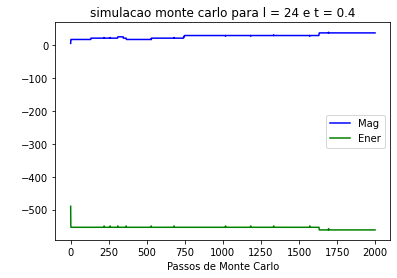

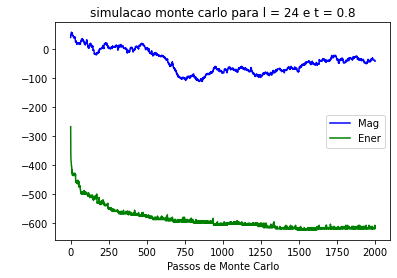

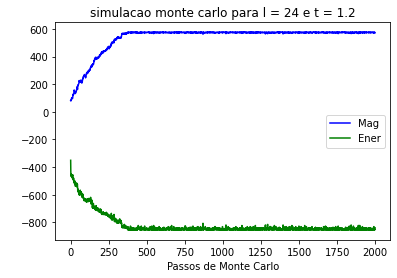

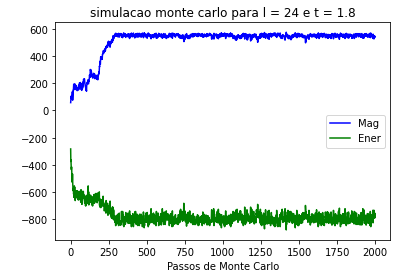

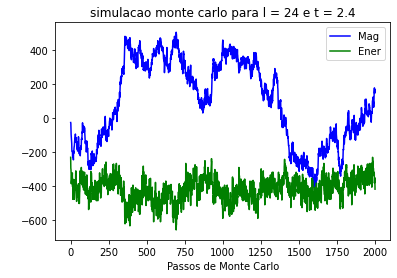

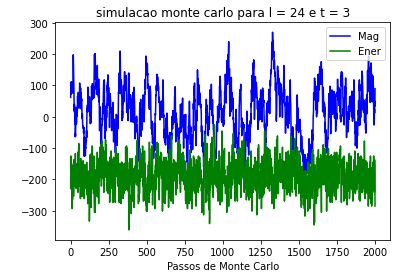

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 30

In [ ]:
l=30
n = l**2

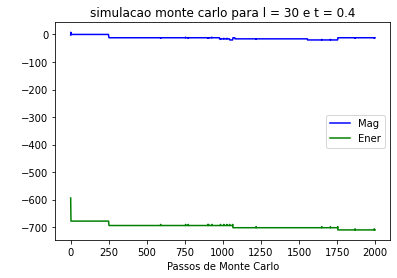

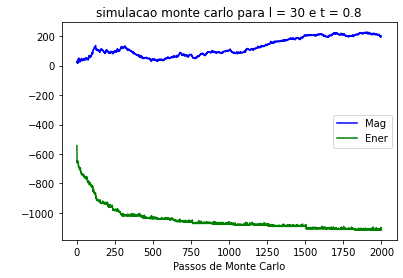

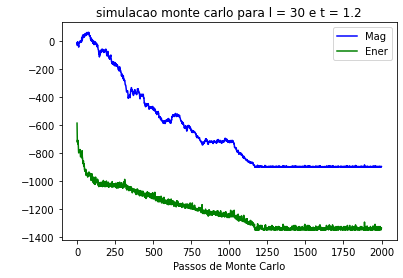

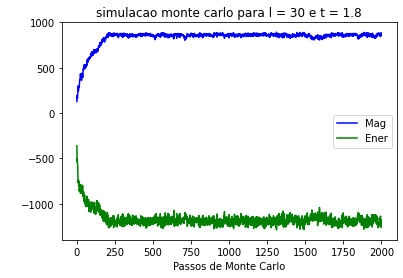

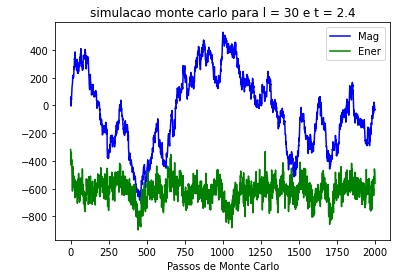

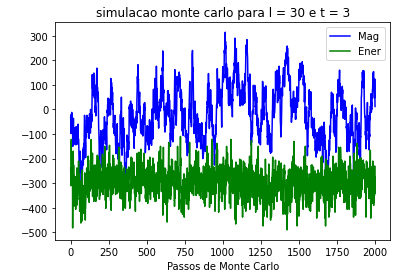

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)
soma =
t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 38

In [ ]:
l=38
n = l**2

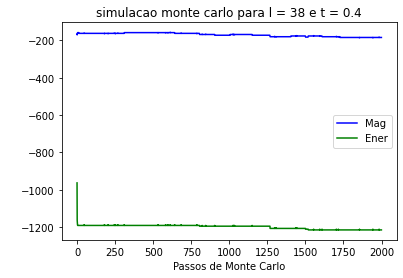

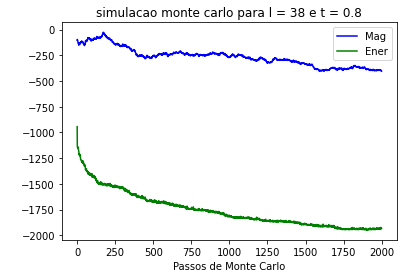

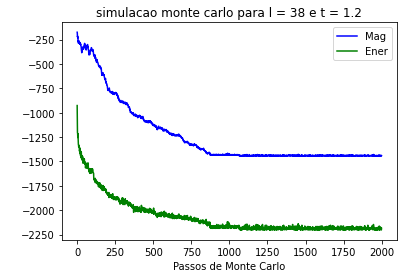

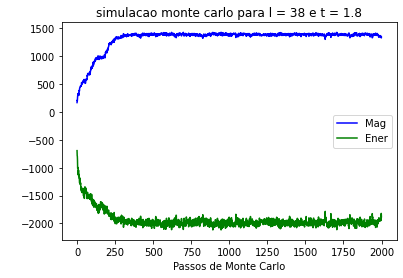

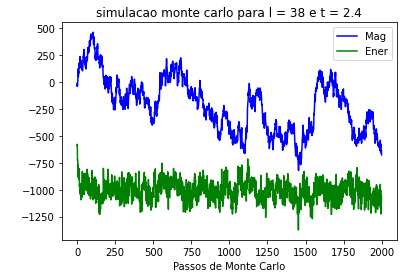

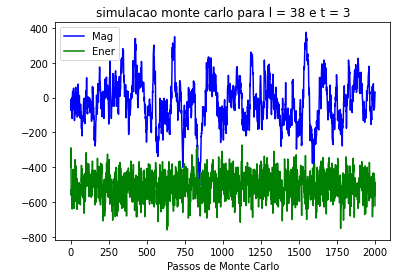

In [ ]:
t = 0.4
rotina(l,n,t,steps)
soma =
t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)soma =

##simulações para redes de tamanho 46

In [ ]:
l=46
n = l**2

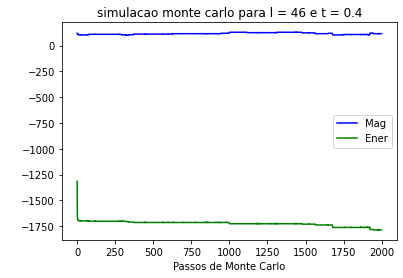

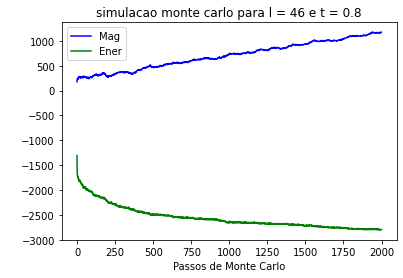

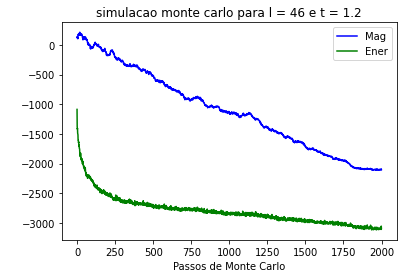

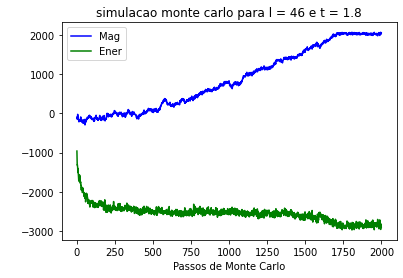

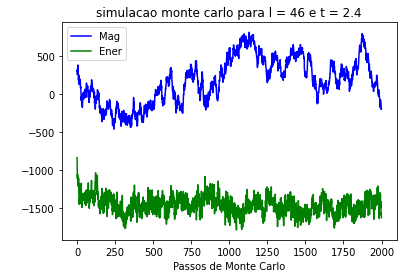

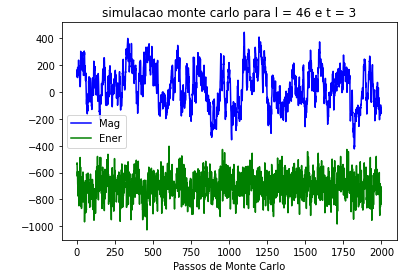

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 54

In [ ]:
l=54
n = l**2

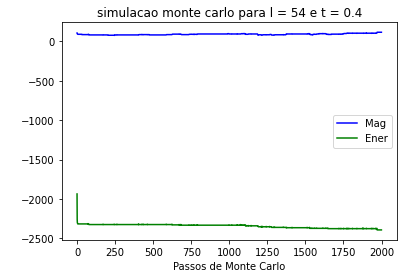

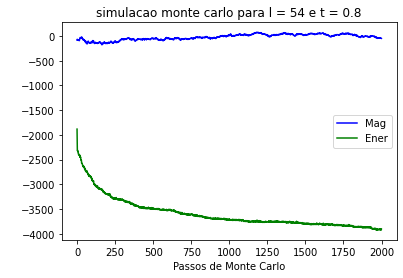

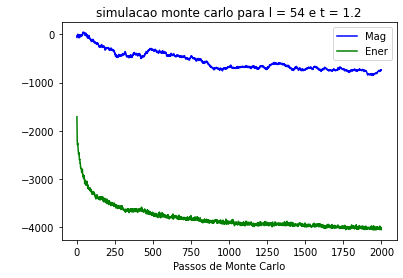

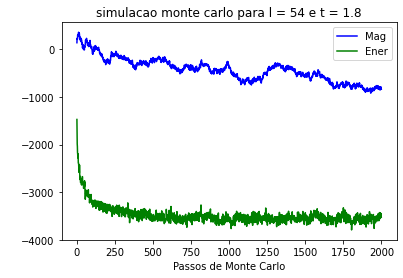

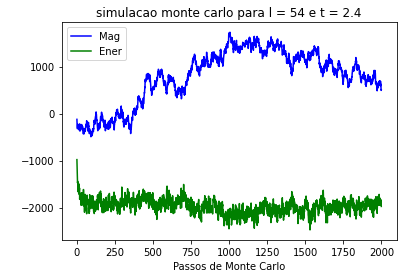

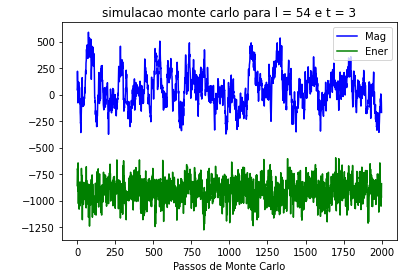

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 60

In [ ]:
l=60
n = l**2

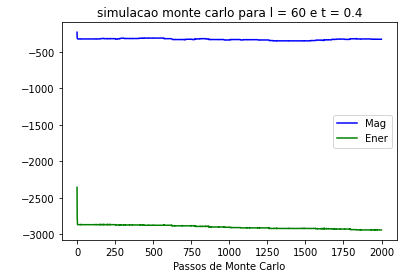

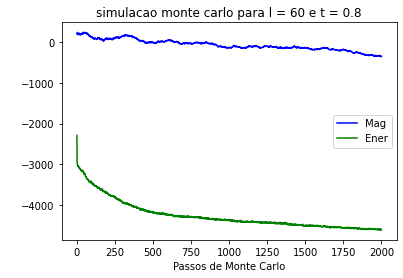

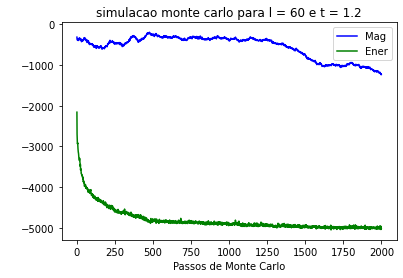

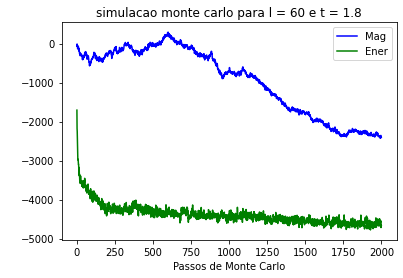

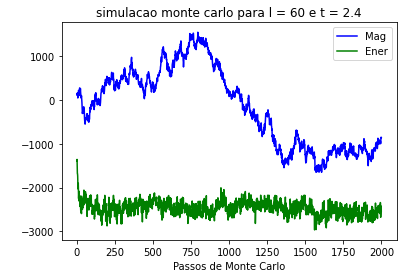

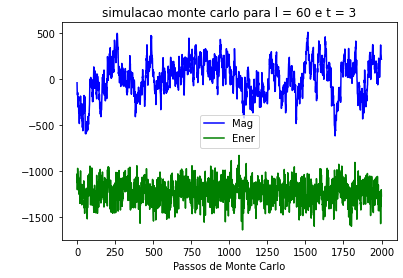

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 68

In [ ]:
l=68
n = l**2

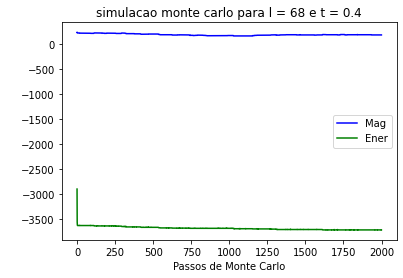

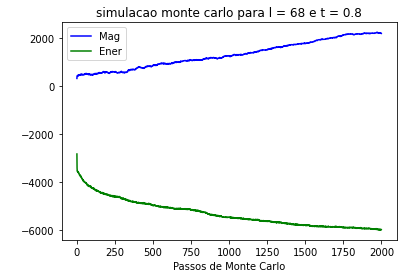

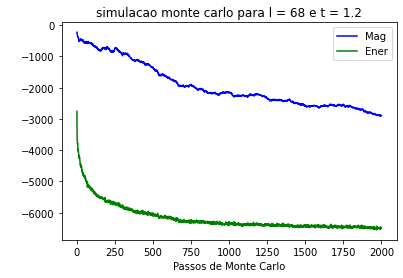

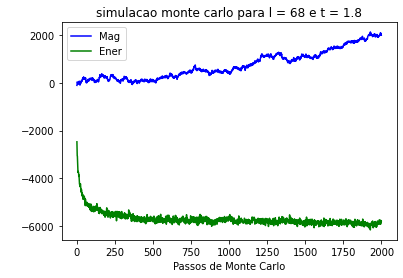

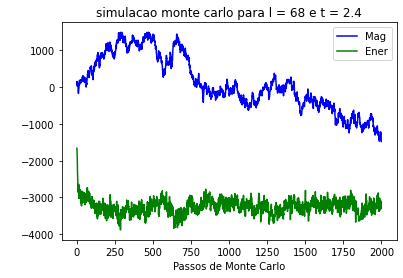

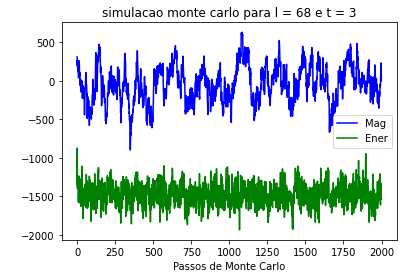

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 76

In [ ]:
l=76
n = l**2

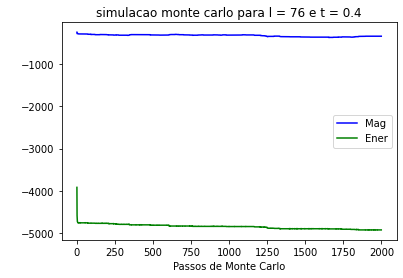

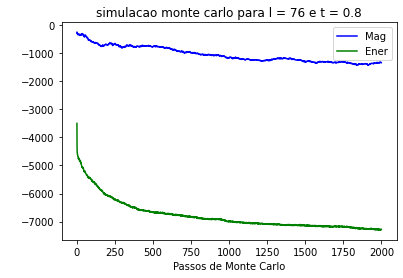

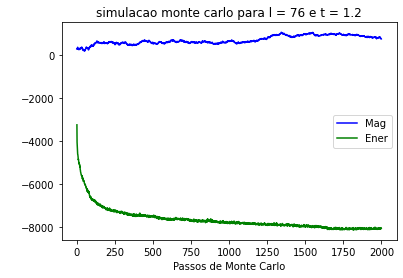

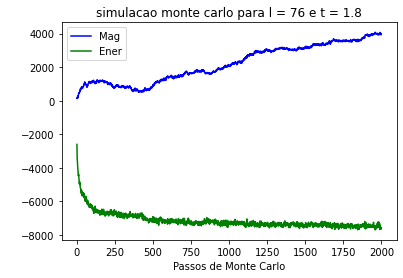

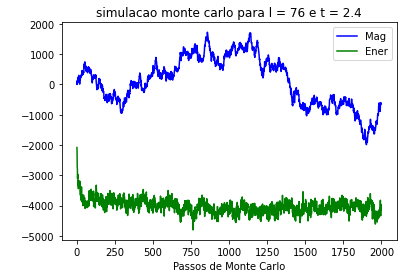

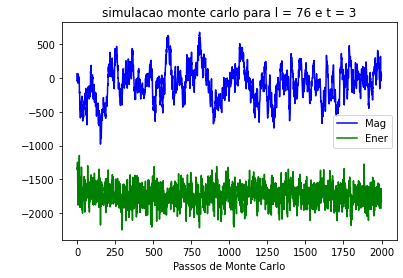

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 84

In [ ]:
l=84
n = l**2

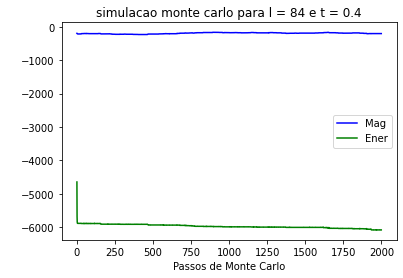

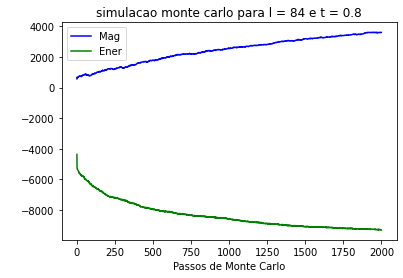

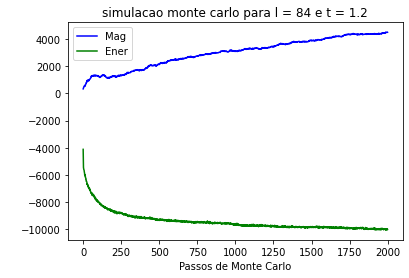

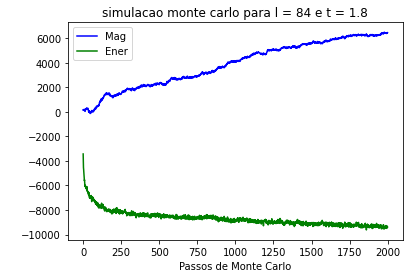

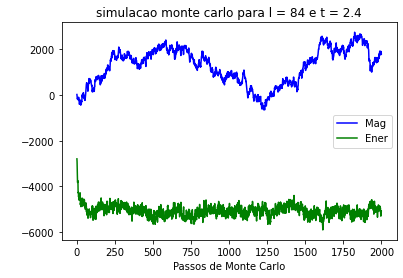

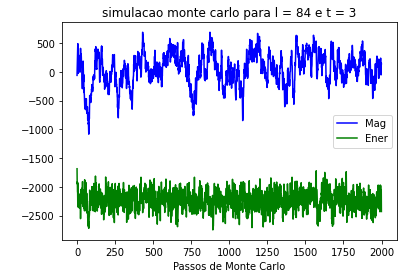

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 90

In [ ]:
l=90
n = l**2

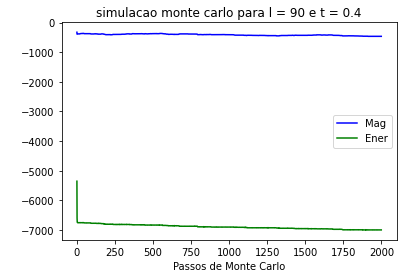

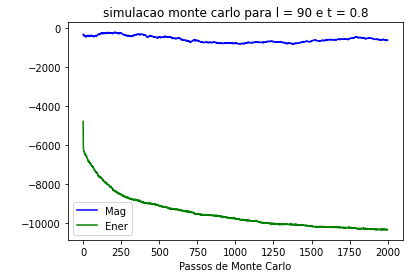

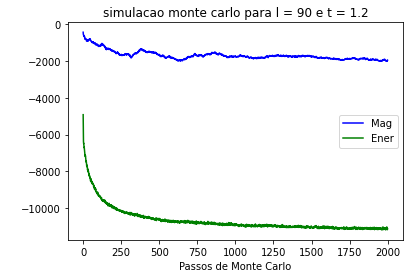

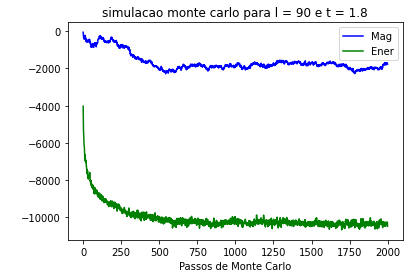

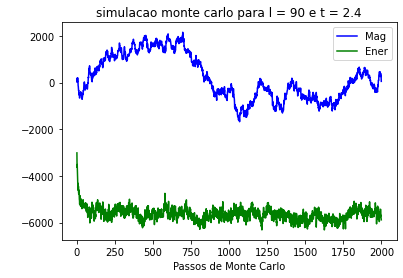

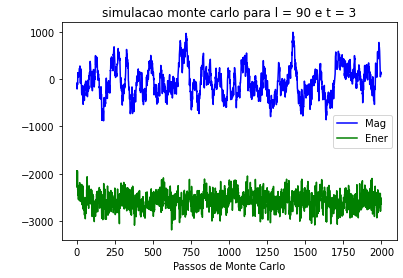

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

##simulações para redes de tamanho 100

In [ ]:
l=100
n = l**2

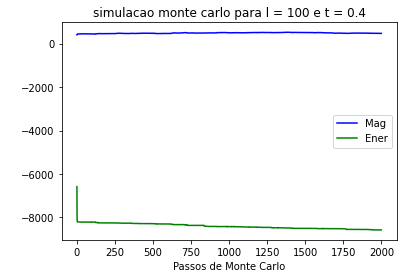

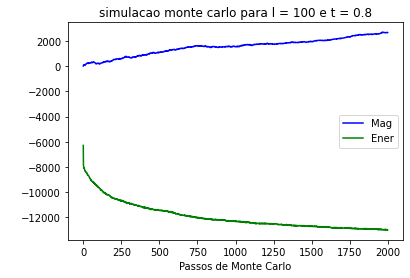

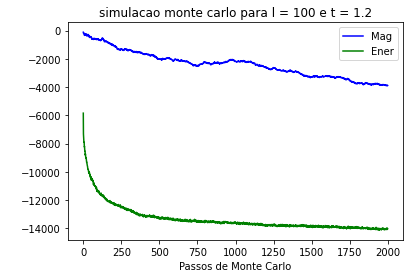

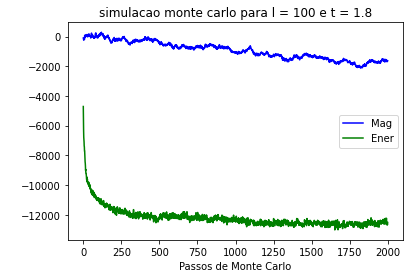

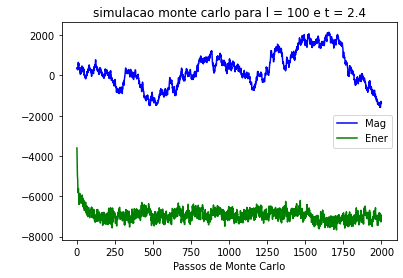

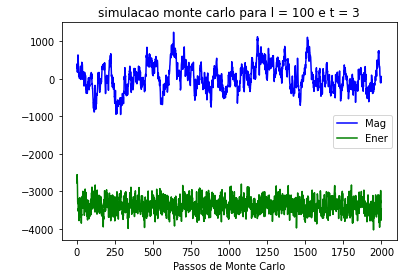

In [ ]:
t = 0.4
rotina(l,n,t,steps)

t = 0.8
rotina(l,n,t,steps)

t = 1.2
rotina(l,n,t,steps)

t = 1.8
rotina(l,n,t,steps)

t = 2.4
rotina(l,n,t,steps)

t = 3
rotina(l,n,t,steps)

# Relatório

Foi realizado testes variando o tamanho da rede de 24 até 100 respeitando um intervalo médio. Alé disso, para cada tamanho de rede também foi variado a temperatura de 0.4 até 3 respeitando também um intervalo entre os valores. 

Como resultado médio para todos os tamanhos de rede é possível perceber que a flutação dos valores aumenta para grandes temperaturas e por isso não há um ponto de estabilização dos valores. Este fato é esperado pois pra valores altos de temperatura signifca variação maior da energia. 

O resultado de cada simulação depende muito do estado inicial randômico mas, principalmente para estados de baixa temperatura, há o problema dos estados ficarem presos em mínimos locais e isso acabar interferindo no resultado final da simulação.   

Os estados com teperaturas mais baixas acabam convergindo em um algum número de passos de Monte Carlo. É possível notar que redes de tamanhos maiores demoram um pouco mais até convergirem mas sempre acabam convergindo também em algum momento diferentemente das temperaturas altas. 